In [15]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

train_percent = 0.4  # To be modified
valid_percent = 0.1  # To be modified
import csv 
# Modify the data location for loading data
data = np.loadtxt('C:/Users/용자/Desktop/2019_2 과제/머신러닝/HW2/data.csv', unpack=True, delimiter=',',skiprows=0 )


array([[ 1.4289 ,  1.2643 , -1.362  , ...,  1.337  ,  1.0654 , -0.80376],
       [ 4.3156 ,  6.6349 ,  0.95923, ...,  5.8648 ,  7.2634 ,  3.0365 ]])

In [16]:
data[0]

array([ 1.4289 ,  1.2643 , -1.362  , ...,  1.337  ,  1.0654 , -0.80376])

In [1]:

# Write a code for acquiring unbiased data
x, y = data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=1-train_percent, random_state=0)
len(train_x), len(test_x)

NameError: name 'data' is not defined

---------------------- 

We can choose best polynomial order with MSE of validation set.
Optimal order is  1
Minimum MSE is  18.822852341499903


-----TEST RESULT-----


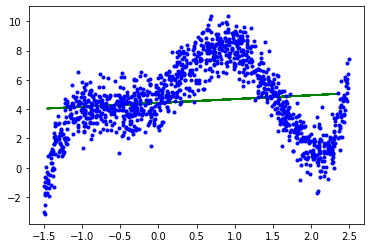

In [32]:
# #Obtaining Training data set
# train_set = data[0:int(len(data)*train_percent)]
# train_set = sorted(train_set, key=lambda train_set: train_set[0]) # Sorting again for data in order
# train_set = np.transpose(train_set)

#Reallocate for efficient programming
# train_x = train_set[0]  #train_set[0] : feature data set (i.e, x)
# train_y = train_set[1] #train_set[1] : lable data set (i.e, y)


#Write code for obtaining valid data set : valid_set
# train_x, test_x, train_y, test_y = train_test_split(x, y, train_percent, random_state=0)

# valid_x = valid_set[0]
# valid_y = valid_set[1]

# #Write code for obtaining test data set :test_set

# test_x = test_set[0]
# test_y = test_set[1]



##################### Regression Libraries #############
def fit_polynomial(x,y , degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y
##################### End of Regression Libraries #############

# Starting values
Optimal_Order = 0
Minimum_MSE = 9999
Optimal_Model=None

# Determine minimum MSE for valid set as increasing polynomial order from 1 to 10.
for polynomial_order in range(1, 10) :
    train_x, verifi_x, train_y, verfi_y = train_test_split(train_x, train_y, test_size=0.1)
    model = fit_polynomial(train_x, train_y, polynomial_order)
    
    Estimated_verifi_y = apply_polynomial(model, verifi_x)

   # Write codes measuring MSE for valid set
   # For calculating MSE use the library "mean_squared_error" in "sklearn.metrics"
    MSE = np.square(np.subtract(verifi_x, Estimated_verifi_y)).mean() 
    if Minimum_MSE> MSE :
        Optimal_Order = polynomial_order
        Minimum_MSE = MSE
        Optimal_Model = model
        

print("----------------------","\n")
print("We can choose best polynomial order with MSE of validation set.")
print("Optimal order is ", Optimal_Order)
print("Minimum MSE is ", Minimum_MSE)
print("\n")
print("-----TEST RESULT-----")

#Overlay Regression polynomial along training feature data and test data set (test_x, test,y)
plt.plot(train_x, apply_polynomial(Optimal_Model, train_x),'g')   # Display with lines colored with green (g).
plt.plot(test_x, test_y, 'b.') # Display with dots colored with blue (b).


In [23]:

#Write code for calculating from sklearn.cross_validation import cross_val_score.
polynomial_order = 9
model = fit_polynomial(train_x, train_y, polynomial_order)
Estimated_train_y = apply_polynomial(model, train_x)

# Write codes measuring MSE for valid set
# For calculating MSE use the library "mean_squared_error" in "sklearn.metrics"
MSE = np.square(np.subtract(train_y, Estimated_train_y)).mean() 



print("MSE : ", MSE_Performance)

print("The coefficient of model is ",Optimal_Model.coef_,",  ",Optimal_Model.intercept_)

plt.xlabel('Feature values : x')
plt.ylabel('Lable values : y')
plt.grid()
plt.suptitle('Polynomial Regression',fontsize=16)
plt.show()

NameError: name 'MSE_Performance' is not defined